# **Hidden Markov Model**
 - 상태(States)를 가지는 시계열 관찰값(Observation)을 확률적으로 모델링 할 때, HMM을 사용한다.
 - HMM 모델의 구성요소 : $m=(T, E, \pi)$
  - Transition probabilities matrix $(T)$
  - Emission probabilities matrix $(E)$
  - Initial probabilities $(\pi)$
 - HMM 모델링과 관련된 Problems
  - Evaluation : HMM 모델과 observation열이 주어졌을 때, 주어진 모델에서 observation열이 관찰될 확률을 구하라.
  - Decode : HMM 모델과 Observation열이 주어졌을 떄, observation열이 발생할 가능성이 제일 높은 status의 열을 구하라.
  - Leanring : Observation열이 주어졌을 때, 해당 Observation열을 가장 잘 설명할 수 있는 HMM의 parameter를 구하라.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# pypi에서 제공하는 라이브러리를 이용하자. 이것은 기본기능이 제공되는 라이브러리이며, 단순히 튜토리얼을 위하여 사용하였다.
# 이후로는 PyMC3를 이용하여 구현할 것이다.
import hmms

In [3]:
# Sklearn에서 제외되어 pypi로 변경된 라이브러리
import hmmlearn

## **DtHmm (Discrete time HMM)**

### **1. Model parameter가 주어졌을 때, model을 생성하자**

In [4]:
# Transition probabilities matrix : states are 2.
A = np.array([[0.9, 0.1], 
              [0.4, 0.6]])
# Emission probabilities matrix : P(output|state), Outputs are 3.
B = np.array([[0.9, 0.08, 0.02], 
              [0.2, 0.5, 0.3]])
# Initial probabilities
Pi = np.array([0.8, 0.2])

# Create DtHMM
dhmm = hmms.DtHMM(A, B, Pi)

> ** 생성된 모델을 이용하여, state sequence 및 emission sequence를 생성하자. **

In [5]:
seq_len = 20
# State sequence and emission sequence
s_seq, e_seq = dhmm.generate(seq_len)

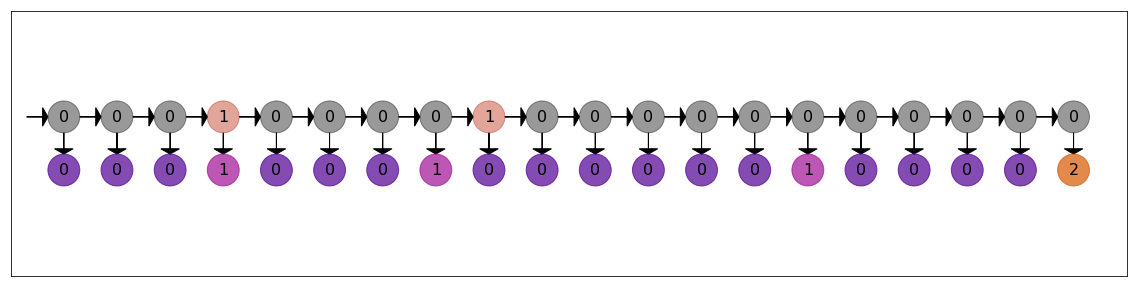

In [6]:
plt.rcParams['figure.figsize'] = [20, 20]
hmms.plot_hmm(s_seq, e_seq)

> **Most likely state sequence ** : 모델과 emission sequence가 주어졌을 때, 가장 그럴듯한 state sequence를 찾을 수 있다.

In [7]:
(log_prob, s_seq) = dhmm.viterbi(e_seq)

In [8]:
# 주어진 emission sequence에 대하여, 주어진 emission sequnece가 발생했을 확률이 높은 state sequence에 대한 확률
np.exp(log_prob)

3.417641649484109e-07

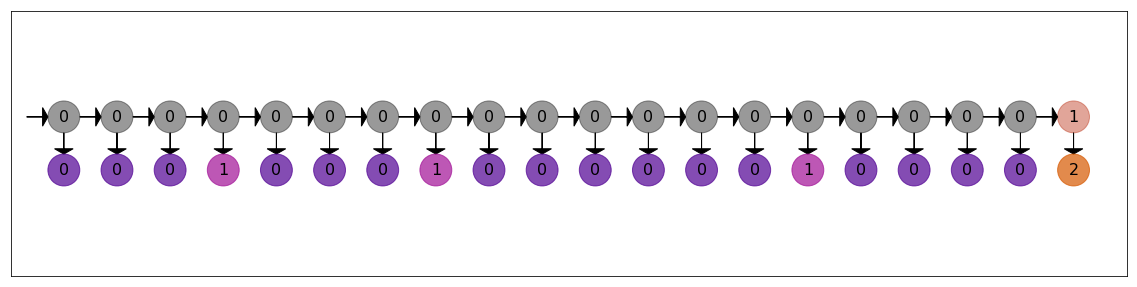

In [9]:
hmms.plot_hmm(s_seq, e_seq)

In [10]:
# 해당 모델에서 e_seq가 발생할 확률
np.exp(dhmm.emission_estimate(e_seq))

2.0942607301951374e-06

In [11]:
# 해당 모델에서 e_seq와 s_seq가 함께 발생할 확률 : 이것은 log_prob와 같다.
np.exp(dhmm.estimate(s_seq, e_seq))

3.417641649484109e-07

### **2. 기존 모델에서 데이터를 생성 vs Random parameter로 생성된 모델에서 생성 **

In [12]:
seq_num = 5
seq_len = 50

# 기존 모델에서 데이터를 생성하자.
_, data = dhmm.generate_data((seq_num, seq_len))

In [13]:
# Random parameter를 이용하여 생성한 모델에서 데이터를 생성하자.
# Num of hidden states, num of outputsz
dhmm_r = hmms.DtHMM.random(2, 3)

In [14]:
hmms.print_parameters(dhmm_r)

Initial probabilities (π) :


,0
0,0.678128
1,0.321872


Transition probabilities matrix (A):


,0,1
0,0.290531,0.709469
1,0.024122,0.975878


Emission probabilities matrix (B):


,0,1,2
0,0.496218,0.326435,0.177348
1,0.093436,0.601782,0.304782


In [15]:
# 기존 모델에서 데이터가 생성되었을 확률 (이 데이터는 기존 모델에서 생성된 것이다.)
np.exp(dhmm.data_estimate(data))

8.631914930988462e-74

In [16]:
# Random param 모델에서 데이터가 생성되었을 확률 (이 데이터는 기존 모델에서 생성된 것이다.)
np.exp(dhmm_r.data_estimate(data))

5.956865722864072e-185

In [17]:
# Data를 이용하여 random params 모델의 param을 튜닝해보자.
dhmm_r.baum_welch(data, 10)

iteration  1 / 10
iteration  2 / 10
iteration  2 / 10
iteration  2 / 10
iteration  2 / 10
iteration  2 / 10
iteration  2 / 10
iteration  2 / 10
iteration  2 / 10
iteration  2 / 10


In [18]:
# 모델이 향상되었다.
np.exp(dhmm_r.data_estimate(data))

8.119304756980938e-72

In [19]:
dhmm_r.baum_welch(data, 100)

iteration  1 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2 / 100
iteration  2

In [20]:
# 모델이 향상되었다.
np.exp(dhmm_r.data_estimate(data))

1.1252282899613065e-71

In [21]:
seq_num = 5
seq_len = 50

# 한번 더, s_seqs와 e_seqs를 생성해보자.
s_seqs, e_seqs = dhmm.generate_data((seq_num, seq_len))

# Emission seqs와 States seqs가 동시에 주어졌을 때(full), 두 개의 seqs를 가장 잘 나오게 할(most likely) params를 추정해보자.
dhmm_r = hmms.DtHMM.random(2, 3)
dhmm_r.maximum_likelihood_estimation(s_seqs, e_seqs)

In [22]:
print(np.exp(dhmm.full_data_estimate(s_seqs, e_seqs)))
print(np.exp(dhmm_r.full_data_estimate(s_seqs, e_seqs)))

4.246713764751851e-104
8.587625118465413e-103


**Emission sequences와 states sequences가 동시에 주어지는 상황에서는 random model을 생성한 후, params를 튜닝하는것이 좋다고 생각된다.**

## **CtHMM(Continuous time HMM)**

### **1. Model parameter가 주어졌을 때, model을 생성하자**

In [23]:
# Q is the matrix of transition rates from state [row] to state [column].
Q = np.array( [
    [-0.375, 0.125, 0.25],
    [0.25, -0.5, 0.25],
    [0.25, 0.125, -0.375]
] )
# B is the matrix of probabilities that the state [row] will emmit output variable [column].
B = np.array( [
    [0.8, 0.05, 0.15],
    [0.05, 0.9, 0.05],
    [0.2, 0.05, 0.75]
] )
# Pi is the vector of initial state probabilities.   
Pi = np.array( [0.6, 0, 0.4] )

# Create CtHMM by given parameters.
chmm = hmms.CtHMM(Q,B,Pi)

### **2. 모델을 이용하여 time sequence, states sequence, emission sequence를 생성한다.**

In [24]:
seq_len = 10
t_seq, s_seq, e_seq = chmm.generate(seq_len, 0.5)

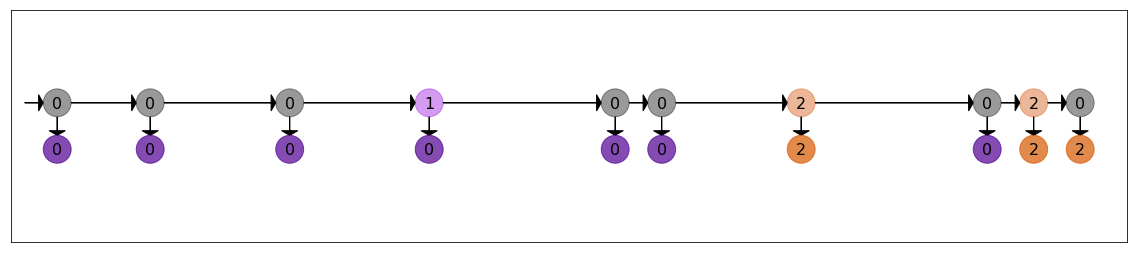

In [25]:
plt.rcParams['figure.figsize'] = [20, 20]
hmms.plot_hmm(s_seq, e_seq, time=t_seq)

> **Time sequence와 emission sequence가 주어졌을 때, states sequence를 Viterbi algorithm을 이용하여 예측하여 보자.**

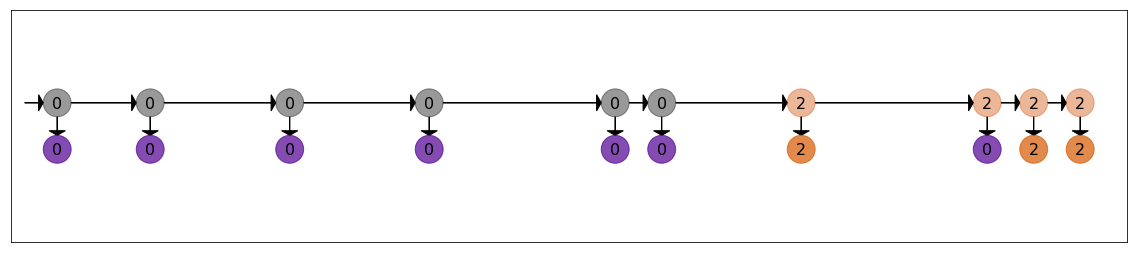

In [26]:
(log_prob, s_seq) = chmm.viterbi(t_seq, e_seq)
hmms.plot_hmm(s_seq, e_seq, time=t_seq)

In [27]:
# 해당 statues sequences가 발생할 확률
np.exp(log_prob)

4.7098712210561165e-05

In [28]:
# 해당 모델에서 time, emission sequence가 발생할 확률
np.exp(chmm.emission_estimate(t_seq, e_seq))

0.00029294674575057125

In [29]:
np.exp(chmm.estimate(s_seq, t_seq, e_seq))

4.7098712210561165e-05

In [30]:
# 다음 seq조건을 만족하고, 주어진 CtHMM 모델을 따르는, 데이터를 생성한다.
seq_num = 5
seq_len = 50

t, e = chmm.generate_data((seq_num, seq_len))

In [31]:
# Random하게 모델을 생성하고, parameter를 확인해보자.
chmm_r = hmms.CtHMM.random(3,3)
hmms.print_parameters(chmm_r)

Initial probabilities (π) :


,0
0,0.307509
1,0.520286
2,0.172204


Transition rate matrix (Q):


,0,1,2
0,-1.000000,0.620481,0.379519
1,0.845332,-1.000000,0.154668
2,0.646503,0.353497,-1.000000


Transition probabilities for one time unit :


,0,1,2
0,0.531148,0.289209,0.179643
1,0.377664,0.493490,0.128846
2,0.332746,0.228894,0.438360


Emission probabilities matrix (B):


,0,1,2
0,0.564059,0.136617,0.299324
1,0.875088,0.016289,0.108623
2,0.350317,0.240450,0.409234


In [32]:
# 처음에 주어졌던 CtHMM 모델에서, 해당 time, emission sequence가 발생했을 확률
np.exp(chmm.data_estimate(t,e))

6.516180179689766e-114

In [33]:
# Random하게 생성한 CtHMM 모델에서, 해당 time, emission sequence가 발생했을 확률
np.exp(chmm_r.data_estimate(t, e))

2.559786228369013e-128

In [34]:
# Random 모델에서 Baum Welch 모델을 사용하여, parameter를 튜닝할 것이다.
chmm_r.baum_welch(t, e, 100, ext=True)

iteration  113497633 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iteration  3 / 100
iter

In [35]:
# 이전 확률과 비교했을 때, 월등히 높아졌다. 그리고 해당 데이터를 생성했던, CtHMM 모델보다 성능이 더욱 향상되었다.
out = chmm_r.data_estimate(t, e)

In [36]:
np.exp(out)

9.59268574936297e-112

In [37]:
seq_num = 5
seq_len = 50

#generate artificial dataset of times, hidden states and emissions sequences
t_seqs, s_seqs, e_seqs = chmm.generate_data( (seq_num,seq_len), states=True )

chmm_r = hmms.CtHMM.random(3,3) 
chmm_r.maximum_likelihood_estimation(s_seqs,t_seqs,e_seqs,100,est=True )

it 0
it 1
it 2
it 3
it 4
it 5
it 6
it 7
it 8
it 9
it 10
it 11
it 12
it 13
it 14
it 15
it 16
it 17
it 18
it 19
it 20
it 21
it 22
it 23
it 24
it 25
it 26
it 27
it 28
it 29
it 30
it 31
it 32
it 33
it 34
it 35
it 36
it 37
it 38
it 39
it 40
it 41
it 42
it 43
it 44
it 45
it 46
it 47
it 48
it 49
it 50
it 51
it 52
it 53
it 54
it 55
it 56
it 57
it 58
it 59
it 60
it 61
it 62
it 63
it 64
it 65
it 66
it 67
it 68
it 69
it 70
it 71
it 72
it 73
it 74
it 75
it 76
it 77
it 78
it 79
it 80
it 81
it 82
it 83
it 84
it 85
it 86
it 87
it 88
it 89
it 90
it 91
it 92
it 93
it 94
it 95
it 96
it 97
it 98
it 99


array([-409.2606087 , -377.78824212, -368.88065958, -365.70643997,
       -364.35468349, -363.6773144 , -363.2603121 , -362.93989178,
       -362.64926853, -362.36085758, -362.0630475 , -361.75072519,
       -361.42142653, -361.0738015 , -360.70703099, -360.32063546,
       -359.9144477 , -359.48865784, -359.04389325, -358.58131652,
       -358.10273071, -357.6106806 , -357.10853586, -356.60053755,
       -356.09178662, -355.58815217, -355.09608202, -354.62230858,
       -354.17346086, -353.75561537, -353.37384004, -353.03179913,
       -352.73148639, -352.47313489, -352.25531947, -352.0752285 ,
       -351.92904993, -351.81240013, -351.72072736, -351.64964012,
       -351.59513607, -351.55373062, -351.52250129, -351.49907083,
       -351.48155311, -351.4684814 , -351.45873305, -351.45145922,
       -351.4460239 , -351.44195363, -351.43889737, -351.43659548,
       -351.43485603, -351.43353706, -351.43253345, -351.43176713,
       -351.43117999, -351.43072864, -351.43038056, -351.43011

In [38]:
# 확률을 비교하자.
log_est =  chmm.full_data_estimate  ( s_seqs,t_seqs,e_seqs )
log_est_1 = chmm_r.full_data_estimate  ( s_seqs,t_seqs,e_seqs )

In [39]:
np.exp(log_est)

3.0272540306152304e-156

In [40]:
# maximum_likelihood_estimation를 사용한 경우 확률이 더 높다.
np.exp(log_est_1)

2.3782865634894226e-153